# Mimetic Finite Difference Method for Fluid Simulation

In this notebook we discretize and solve the fluid equations in 2D, to demonstrate the Mimetic Finite Difference (MFD) method.
We will consider the incomressible Euler equations:

$$ \begin{align*}
\nabla \cdot \vec{u} &= 0 \\
\frac{\partial \vec{u}}{\partial t} + \vec{u} \cdot \nabla \vec{u} + \frac{1}{\rho}\nabla p &= \vec{f}
\end{align*} $$
where $\vec{u}$ is the velocity field, $p$ is the pressure driving the internal source term $\nabla p$, and $\vec{f}$ is the external source term representing external forces. These equations are solved on a domain $\Omega \subset \mathbb{R}^2$.

The velocity is first advected by solving 
$\partial \vec{u}/\partial t + \vec{u} \cdot \nabla \vec{u} = 0$ on a divergence-free velocity field. The external forces $\vec{f}$ are then applied to the resulting velocity field. Finally the velocity is corrected to be divergence-free using the incomressibility equations 
$$ \begin{align}
\nabla \cdot \vec{u} &= 0 \\
\frac{\partial \vec{u}}{\partial t} + \frac{1}{\rho}\nabla p &= 0
\end{align} $$

The MFD method is used to solve for incompressibility of the velocity field. In the following sections, we shall denote the advected velocity by $\vec{u}^*$ and assume that $\vec{f} = \vec{0}$ unless otherwise stated. The second incompressibility equation is discretized in time using a forward Euler scheme thus reducing the above equations to
$$ \begin{align*}
\nabla \cdot \vec{u} &= 0 \\
\vec{u} &= \vec{u}^* - \Delta t \nabla p
\end{align*} $$
where we have taken $\rho = 1$ for simplicity. We can now eliminate the velocity unknown, further simplifying the equation to
$$ \Delta t \nabla \cdot \nabla p = \nabla \cdot \vec{u}^*, $$
which is precisely the euqation we will focus on.

A critical part of the method is enforcing boundary conditions. In general the above equations are subject to Dirichlet and Neumann boundary conditions:
$$ \begin{align*}
p &= f^D \text{ on } \Gamma^D \\
\vec{n} \cdot \vec{u} &= f^N \text{ on } \Gamma^N
\end{align*} $$
where $\Gamma^D$ and $\Gamma^N$ are parts of the boundary on which Dirichlet and Neumann boundary conditions are enforced respectively, and $\vec{n}$ is the outward facing normal to the domain boundary $\partial \Omega = \Gamma^D \cup \Gamma^N$.

## The MFD method on a regular grid

First, we discretize a standard square grid on the domain $\Omega = [-1,1] \times [-1,1] \subset \mathbb{R}^2$. Pressures are stored on grid nodes, and velocities are broken into the horizontal and vertical components along grid lines, sampled midway into a cell face/edge. In some sense this discretization is dual to the standard MAC grid.

The pressure degrees of freedom on the grid are denoted by $p_i = p(\vec{x}_i)$ for each node $i$ at position $\vec{x}_i$. The vector describing these pressure values at all nodes is denoted by $\mathbf{p} = (p_i)_i$.

Velocities are sampled on edge midpoints as $u_e = \frac{1}{\left\|\vec{x}_j - \vec{x}_i\right\|}\int_e \vec{u}\cdot d\hat{\tau}$ for each edge $e = (\vec{x}_i, \vec{x}_j)$, where $\hat{\tau}$ is the tangential unit vector. The vector describing these velocity values at all edges on the discrete mesh is denoted by $\mathbf{u} = (u_e)_e$.

Let $N_V$ denote the number of nodes and $N_E$, the number of edges on the grid. In fact on a grid of $n\times n$ nodes, $N_V = n^2$ and $N_E = 2n(n-1)$. Also note that $\mathbf{p} \in \mathbb{R}^{N_V}$ and $\mathbf{u} \in \mathbb{R}^{N_E}$.

<img src="grid-sample.svg" style="width: 8em; height 8em; display: inline; float: right; margin: 0.5em">

Note that the horizontal and vertical edges on the grid mesh are chosen to point right and up respectively. The figure on the right gives an example of a $3\times3$ node grid where the <font color="0000bf"><b>pressures</b></font> are stored at the nodes (in <font color="0000bf"><b>blue</b></font>), and <font color="bf0000"><b>velocities</b></font> are stored at the edge midpoints (in <font color="bf0000"><b>red</b></font>).

We define a gradient operator $\mathbf{G} : \mathbb{R}^{N_V} \to \mathbb{R}^{N_E}$ on the mesh by
$$ (\mathbf{G} \mathbf{p})_e = \frac{p_j - p_i}{\left\|\vec{x}_j - \vec{x}_i\right\|}. $$
Using the MFD technology we can also define a corresponding discrete divergence operator as the dual of the given gradient operator:
$$ \mathbf{D} \equiv - \mathbf{M}_V^{-1} \mathbf{G}^T \mathbf{M}_E, $$
where $\mathbf{M}_V$ and $\mathbf{M}_E$ are the inner product matrices (i.e. symmteric positive definite). These matrices define the unique inner products on $\mathbb{R}^{N_V}$ and $\mathbb{R}^{N_E}$ as follows

$$
\begin{align*}
\langle\mathbf{q}, \mathbf{r}\rangle_V &\equiv \mathbf{q}^T\mathbf{M}_V\mathbf{r} 
&& \forall \mathbf{q}, \mathbf{r} \in \mathbb{R}^{N_V}\\
\langle\mathbf{v}, \mathbf{w}\rangle_E &\equiv \mathbf{v}^T\mathbf{M}_E\mathbf{w}
&& \forall \mathbf{v}, \mathbf{w} \in \mathbb{R}^{N_E}.
\end{align*}
$$

The duality between $\mathbf{G}$ and $\mathbf{D}$ is illustrated by the following relationship 
$$ 
\langle\mathbf{G}\mathbf{q}, \mathbf{v}\rangle_E = -\langle\mathbf{q}, \mathbf{D}\mathbf{v}\rangle_V
$$

This formulation allows us to discretize the PDE as $\Delta t \mathbf{D}\mathbf{G}\mathbf{p} = \mathbf{D}\mathbf{u}^*$, which becomes
$$
\Delta t \mathbf{G}^T\mathbf{M}_E\mathbf{G}\mathbf{p} = \mathbf{G}^T\mathbf{M}_E\mathbf{u}^*
$$

In our tests we will assume, for simplicity, that $\Delta t = 1$. Furthermore, since we are only concerned with the edge based inner product, the subscript $E$ can be dropped, leaving us with the simple symmetric positive semi-definite system
$$\mathbf{G}^T \mathbf{M} \mathbf{G}\mathbf{p} = \mathbf{G}^T \mathbf{M} \mathbf{u}^*$$
where $\mathbf{p}$ is the unknown pressure and $\mathbf{u}^*$ is the input velocity field.

### Building the mass matrix $\mathbf{M}$

We assemble the matrix $\mathbf{M}$ on a per-cell basis mimicking the additivity of the continuous inner product:
$$ \langle \mathbf{u}, \mathbf{v} \rangle = \sum_c \langle \mathbf{u}_c,\mathbf{v}_c \rangle_c = \sum_c \mathbf{u}_c^T \mathbf{M}_c \mathbf{v}_c \forall \mathbf{u}, \mathbf{v} \in \mathbb{R}^{N_E}$$
where $\mathbf{u}_c$ and $\mathbf{v}_c$ are the vectors $\mathbf{u}$ and $\mathbf{v}$ restricted to the edges of cell $c$, and $\mathbf{M}_c$ is the corresponding cell-based inner product matrix.

The MFD framework provides second order convergence of the pressure (wrt. grid resolution) under the following condition:

<b>Consistency:</b> For any two vector fields $\vec{u}$ and $\vec{v}$ restricted to the cell $c$ and discretized by $\mathbf{u}_c$ and $\mathbf{v}_c$ on the edges of $c$ respectively, we have that
$$\langle \mathbf{u}_c,\mathbf{v}_c \rangle_c = \int_c \vec{u} \cdot \vec{v}\, dV$$
if $\vec{v}$ and $\nabla \times \vec{u}$ are constant and $\vec{u} \cdot \hat{\tau}_e$ is constant for each edge $e \in\partial c$.

Thus we would like to build a matrix $\mathbf{M}_c$ such that it satisfies the consistency condition.

Note that since $\vec{v}$ is constant, we can express it as
$$\vec{v} = v_x \hat{e}_1 + v_y \hat{e}_2$$
where $\{\hat{e}_1, \hat{e}_2\}$ is a canonical basis of $\mathbb{R}^2$, and $v_x,v_y\in\mathbb{R}$ are constants.
Then let $\vec{q}_1 \equiv (y - y_c)\hat{e}_3$ and $\vec{q}_2 \equiv (x_c-x)\hat{e}_3$ where $(x_c,y_c)$ is the centroid of cell $c$ and $\hat{e}_3$ supplements our basis to span $\mathbb{R}^3$. Note that $\hat{e} = \nabla \times \vec{q}_i$ for $i = 1,2$, so we can write
$$\vec{v} = v_x \nabla \times \vec{q}_1 + v_y \nabla \times \vec{q}_2 = \nabla \times (v_x\vec{q}_1 + v_y\vec{q}_2).$$
Now let $\vec{q} \equiv v_x\vec{q}_1 + v_y\vec{q}_2 = q_z\hat{e}_3$, where $q_z = v_x(y-y_c) + v_y(x_c-x)$. Then observe that
$$
\begin{align*}
\int_c \vec{u} \cdot \vec{v}\, dV &= \int_c \vec{u} \cdot \nabla \times \vec{q}\, dV \\
&= \int_c \vec{q} \cdot \nabla \times \vec{u} dV + \int_c \nabla \cdot (\vec{q} \times \vec{u})\, dV \\
\end{align*}
$$
where the first term is identically zero since $\nabla \times \vec{u}$ is constant and $\int_c \vec{q} dV = 0$. This further reduces to
$$
\begin{align*}
&= \int_c \nabla \cdot (\vec{q} \times \vec{u})\, dV \\
&= \int_{\partial c} (\vec{q} \times \vec{u}) \cdot \hat{n}\, dL \\
&= -\sum_{e\in\partial c}\int_{e} \vec{u} \cdot (\vec{q} \times \hat{n}_{c,e})\, dL \\
&= -\sum_{e\in\partial c}\int_{e} \vec{u} \cdot \alpha_e q_z \hat{\tau}_e\, dL.
\end{align*}
$$
The last step follows from the relationship between the edge normal and our fixed edge directions to be $\alpha_e \hat{\tau}_e = \hat{e}_3 \times \hat{n}_{c,e}$ where $\alpha_e \in \{-1,1\}$ is determined by the orientation of the outward facing normal $\hat{n}_{c,e}$ and the fixed edge direction $\hat{\tau}_e$. Finally since $\vec{u} \cdot \hat{\tau}_e$ is constant on each edge, we can write
$$\int_c \vec{u} \cdot \vec{v}\, dV  = -\sum_{e\in\partial c} \alpha_e \vec{u} \cdot \hat{\tau}_e \int_e q_z\, dL = -\sum_{e\in\partial c} \alpha_e u_e \int_e q_z\, dL. $$
Thus it suffices to find $\mathbf{M}_c$ such that
$$ \mathbf{u}_c^T \mathbf{M}_c \mathbf{v}_c = -\sum_{e\in\partial c} \alpha_e u_e \int_e q_z\, dL $$
in order to satisfy the consistency condition. Note that $\mathbf{u}$ can be any vector in $\mathbb{R}^{N_E}$ since we can always find a $\vec{u}$ such that
$$ \nabla \times \vec{u} = \frac{1}{|c|}\sum_{e\in\partial c} \alpha_e |e| u_e $$
in $c$ subject to boundary conditions $ \hat{\tau}_e \cdot \vec{u} = \alpha_e u_e $ for all $e \in \partial c$. Note that $|c|$ is the area of the cell and $|e| = \|\vec{x}_j - \vec{x}_i\|$ for edge $e = (\vec{x}_i, \vec{x}_j)$.
Therefore we can drop $\mathbf{u}_c$, and write the consistency condition as $\mathbf{M}_c\mathbf{v}_c = \mathbf{r}_c$ where $(\mathbf{r}_c)_e = -\left( \alpha_e \int_e q_z dL \right)_e$. Further, since it suffices to satisfy this condition on the basis of $\mathbb{R}^2$, we can write it as $\mathbf{M}_c \mathbf{N}_c = \mathbf{R}_c$ with 
$$ \begin{align*}
(\mathbf{N}_c)_e &= \left( \hat{\tau}_e \cdot \hat{e}_1,\, \hat{\tau}_e \cdot \hat{e}_2 \right) \\
(\mathbf{R}_c)_e &= \alpha_e \|\vec{x}_j - \vec{x}_i\| \left( y_c - y_e,\, x_e - x_c\right)
\end{align*}
$$
where $(x_e, y_e)$ is the midpoint of edge $e$.

The MFD method prescribes a solution to the above system that gives a symmetric positive definite matrix $\mathbf{M}$. The solution can be computed as follows:
$$ \begin{align*}
\mathbf{M}^0_c &= \mathbf{R}_c (\mathbf{R}_c^T \mathbf{N}_c)^{-1}\mathbf{R}_c^T \\
\mathbf{M}^1_c &= \frac{1}{2}\mathrm{Tr}\left(\mathbf{M}^0_c\right)\left(\mathbf{I} - \mathbf{N}_c(\mathbf{N}_c^T\mathbf{N}_c)^{-1}\mathbf{N}_c^T\right) \\
\mathbf{M}_c &= \mathbf{M}^0_c + \mathbf{M}^1_c
\end{align*}$$
For details on the derivation of this solution, we direct the reader to the "Mimetic Finite Difference Method" by K.Lipnikov et al., as well as "The Mimetic Finite Difference Method for Elliptic Problems" by da Veiga et al.

### Numerical Results
Below we produce a simple program to test the convergence of the MFD method used to compute pressure to enforce incompressibility.

To test convergence we will compare a known pressure solution to a computed pressure sampled on the nodes of the grid given an input velocity field. In addition we can compute the output velocity field and compare it to the expected divergence free velocity field.

We will perform two tests with the folowing functions:
1. $p = x^2 + y^2 -1$,  
   $\vec{u}_{out} = \left(2xy, -y^2\right)^T$, and  
   $\vec{u}_{in} = \vec{u}_{out} + \nabla p = (2xy + 2x, -y^2 + 2y)^T$  
   with Dirichlet boundary conditions pinning the pressure solution to $p$ on the boundary nodes.
   
2. $p = xy^3$,  
   $\vec{u}_{out} = \left(y, -x\right)^T$, and  
   $\vec{u}_{in} = (y + y^3, -x + 3xy^2)^T$  
   with Dirichlet boundary conditions.
   
3. Let $u^+ \equiv \cos( \frac{\sqrt{2}\pi}{3}(y+x)+\frac{\pi}{2})$ and
   $u^- \equiv\cos( \frac{\sqrt{2}\pi}{3}(y-x)-\frac{\pi}{2})$. Then define:  
   $p = -\cos(\frac{\pi}{2}x)\cos(\frac{\pi}{2}y)$,  
   $\vec{u}_{out} = \frac{1}{\sqrt{2}}\left(u^- - u^+, u^- + u^+\right)^T$, and  
   $\vec{u}_{in} = \vec{u}_{out} + \nabla p$  
   with zero Neumann boundary conditions.

First we will define a procedure for convenience to initialize our grid parameters:

In [1]:
module MFDGridMod

    immutable type MFDGrid
        xs::Array{Float64}
        dx::Float64
        n::Int64 # number of nodes in one dimension 
        ne::Int64 # number of horizontal (or vertical) edges
    end

    # Initialize grid parameters
    function init_grid(dx) 
        xs = [-1.0:dx:1.0]; # an array of nodal positions along one axis (same for both axes);

        # Count the degrees of freedom on our grid
        n = length(xs); # number of nodes on each axis
        ne = n*(n-1); # number of horizontal (or vertical) edges

        MFDGrid(xs, dx, n, ne)
    end

    export MFDGrid, init_grid;
end;

In [2]:
import MFDGridMod: MFDGrid, init_grid;

Next we can define procedures to sample continuous functions on our discrete grid mesh:

In [3]:
# Helper function used to sample a vector based function on a grid
function sample_vecfield(g::MFDGrid, vec_field)
    apply_with_off(f, A, off, k) = (i,j) -> A[i,j] = f(g.xs[i]+off[1], g.xs[j]+off[2])[k]; # for vector functions

     # Define a mac-like grid
    uv = Array(Float64, (g.n,g.n-1)); # vertical velocity matrix
    cartesianmap(apply_with_off(vec_field, uv, [0,g.dx*0.5], 2), size(uv));

    uh = Array(Float64, (g.n-1,g.n)); # horizontal velocity matrix
    cartesianmap(apply_with_off(vec_field, uh, [g.dx*0.5,0], 1), size(uh));
    
    [uh[:], uv[:]]
end

function sample_scalarfield(g::MFDGrid, scalar_field)
    apply(f, A) = (i,j) -> A[i,j] = f(g.xs[i], g.xs[j]); # for scalar functions

    mtx = Array(Float64, (g.n,g.n)); # nodal pressure matrix
    cartesianmap(apply(scalar_field, mtx), size(mtx));
    mtx[:]
end

# Define a function to sample given pressure, input and output velocity test functions given some grid size
function init(g::MFDGrid, pres, in_vel, out_vel)
    # assemble system vectors
    p = sample_scalarfield(g, pres);
    u = sample_vecfield(g, in_vel);
    u_sol = sample_vecfield(g, out_vel);

    p, u, u_sol
end

# Converts a computed edge based velocity field into a plottable velocity field
function interpolate_vel(g::MFDGrid, u)
    uh = reshape(u[1:g.ne], (g.n-1, g.n));
    uv = reshape(u[g.ne+1:end], (g.n, g.n-1));
    U = 0.5*(uh[:,1:end-1] + uh[:,2:end]);
    V = 0.5*(uv[1:end-1,:] + uv[2:end,:]);
    U', V'
end;

The following procedures draw the corresponding magnitude and vector fields:

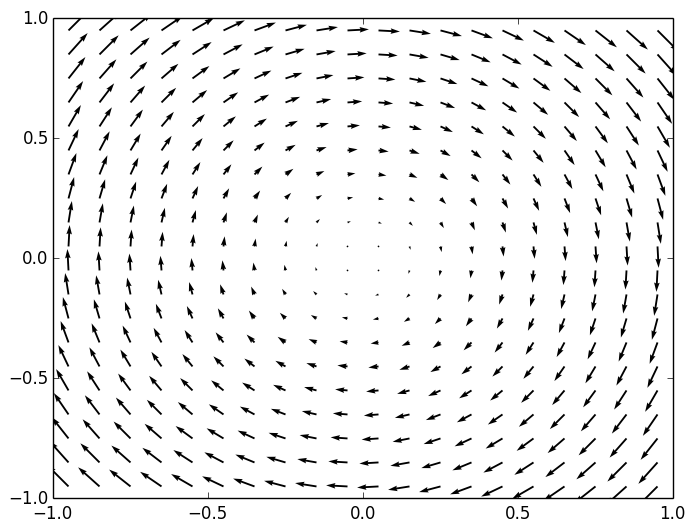

PyObject <matplotlib.quiver.Quiver object at 0x120bdb410>

In [87]:
using Color
using Gadfly
import PyPlot

function plot_nodes(g::MFDGrid, p)
    xmin = repeat(g.xs-g.dx*0.5, outer=[g.n]);
    xmax = repeat(g.xs+g.dx*0.5, outer=[g.n]);
    ymin = repeat(g.xs-g.dx*0.5, inner=[g.n]);
    ymax = repeat(g.xs+g.dx*0.5, inner=[g.n]);
    plot(x_min=xmin, x_max=xmax, y_min=ymin, y_max=ymax, color=p,
          Scale.y_continuous(minvalue=-1, maxvalue=1),
          Scale.x_continuous(minvalue=-1, maxvalue=1),
          Guide.xlabel("x"), Guide.ylabel("y"),
          Coord.cartesian(aspect_ratio=1.0),
          Geom.rectbin, Scale.ContinuousColorScale(c -> RGB(0,c,0)))
end

function plot_hedges(g::MFDGrid, u)
    xmin = repeat(g.xs[1:end-1], outer=[g.n]);
    xmax = repeat(g.xs[2:end], outer=[g.n]);
    ymin = repeat(g.xs-g.dx*0.5, inner=[g.n-1]);
    ymax = repeat(g.xs+g.dx*0.5, inner=[g.n-1]);
    plot(x_min=xmin, x_max=xmax, y_min=ymin, y_max=ymax, color=u[1:g.ne],
          Scale.y_continuous(minvalue=-1, maxvalue=1),
          Scale.x_continuous(minvalue=-1, maxvalue=1),
          Guide.xlabel("x"), Guide.ylabel("y"),
          Coord.cartesian(aspect_ratio=1.0),
          Geom.rectbin, Scale.ContinuousColorScale(c -> RGB(c,0,0)))
end

function plot_vedges(g::MFDGrid, u)
    xmin = repeat(g.xs-g.dx*0.5, outer=[g.n-1]);
    xmax = repeat(g.xs+g.dx*0.5, outer=[g.n-1]);
    ymin = repeat(g.xs[1:end-1], inner=[g.n]);
    ymax = repeat(g.xs[2:end], inner=[g.n]);
    plot(x_min=xmin, x_max=xmax, y_min=ymin, y_max=ymax, color=u[g.ne+1:end],
          Scale.y_continuous(minvalue=-1, maxvalue=1),
          Scale.x_continuous(minvalue=-1, maxvalue=1),
          Guide.xlabel("x"), Guide.ylabel("y"),
          Coord.cartesian(aspect_ratio=1.0),
          Geom.rectbin, Scale.ContinuousColorScale(c -> RGB(0,c,c)))
end

# to plot a vector field, use the following interface:
function plot_vecfield(g::MFDGrid, u)
    # Define a function construct a matrix of values used for plotting
    meshgrid(v::AbstractVector) = meshgrid(v, v)
    function meshgrid{T}(vx::AbstractVector{T}, vy::AbstractVector{T})
        m, n = length(vy), length(vx)
        vx = reshape(vx, 1, n)
        vy = reshape(vy, m, 1)
        (repmat(vx, m, 1), repmat(vy, 1, n))
    end

    X,Y = meshgrid(0.5*g.dx + g.xs[1:end-1], 0.5*g.dx + g.xs[1:end-1]);
    U,V = interpolate_vel(g, u);
    PyPlot.quiver(X, Y, U, V)
end

# test vector field drawing
function test_vecfield_plot()
    dx = 0.1; # side length of one grid cell
    g = init_grid(dx);
    u = sample_vecfield(g, (x,y) -> [y,-x]);
    plot_vecfield(g, u)
end

test_vecfield_plot()

Finally we assemble the required matrices $\mathbf{G}$ and $\mathbf{M}$:

In [5]:
# indices of corner nodes
function get_bdry_corners(g::MFDGrid)
    [1, g.n, g.ne + 1, g.n*g.n] 
end
function get_not_bdry_corners(g::MFDGrid)
    [2:g.n-1, g.n+1:g.ne, g.ne+2:g.n*g.n-1] 
end

# Assemble the Gradient as applied to p (column-wise flattened pressure matrix)
# block giving a column of m-1 horizontal velocities from a column of m pressures
function assemble_G(g::MFDGrid)
    Vd = fill(1.0/g.dx, g.n-2);
    Gcd = spdiagm(([0, -Vd],[Vd, 0]), (0,1));
    Gxsd = kron(speye(g.n), Gcd);
    Gysd = kron(Gcd, speye(g.n));

    # At this point we decide how our edges will be ordered in the matrix equations.
    # We choose the horizontal edges uhin[:] followed by vertical edges uvin[:]
    # return the full gradient operator:
    Gd_temp = [Gxsd; Gysd];
    Gd = Gd_temp[:, get_not_bdry_corners(g)];
    
    V = fill(1.0/g.dx, g.n-1);
    Gc = spdiagm((-V,V), (0,1));
    Gxs = kron(speye(g.n), Gc);
    Gys = kron(Gc, speye(g.n));
    G = [Gxs; Gys];
    Gd, G
end;

It remains to find the mass matrix $\mathbf{M}$, which is assembled per cell within the mimetic framework as follows:

In [6]:
# indices of boundary edges
function get_bdry_edges(g::MFDGrid)
    bottom = [1:g.n-1];
    top = bottom + g.ne - g.n + 1;
    left = g.ne + bottom*g.n - g.n + 1;
    right = left + g.n - 1;
    [left, bottom, right, top]
end

function get_normal_bdry_edges(g::MFDGrid) 
    bottom = g.ne + [1:g.n];
    top = bottom + g.ne - g.n;
    left = [1:g.n]*(g.n-1) - g.n + 2;
    right = left + g.n - 2;
    [left, bottom, right, top]
end

function get_bdry_corner_edges(g::MFDGrid)
    bottom = [1, g.n-1];
    top = bottom + g.ne - g.n + 1;
    left = g.ne + bottom*g.n - g.n + 1;
    right = left + g.n - 1;
    [left, bottom, right, top]
end

# Assemble the matrices R and N, and use them to compute M.
function assemble_M(g::MFDGrid)
    #= The following code will build the matrix M on a per cell level, 
    #  however on a regular grid every cell is identical, so we can 
    #  determine the local matrix symbolically, and construct the global matrix
    #  in a more efficient manner
    # iterate over each cell
    M = spzeros(2*g.ne,2*g.ne); # edge based mass matrix
    for j = 1:(g.n-1)
        for i = 1:(g.n-1)
            c = g.dx*([i, j] - 0.5);
            le = [g.dx*(i-1),c[2]];
            be = [c[1], g.dx*(j-1)];
            re = [g.dx*i,c[2]];
            te = [c[1], g.dx*j];
            # construct in the order left -> bottom -> right -> top
            N = [0 1;  # left
                 1 0;  # bottom
                 0 1;  # right
                 1 0]; # top
            R = (g.dx*g.dx*0.5)*N; # using N as the base matrix
            
            M0 = R*inv(R'*N)*R';
            lambda = trace(M0)/2;
            M1 = lambda*(eye(4)-N*inv(N'*N)*N');
            Mc = M0 + M1;
            li = g.ne + i + g.n*(j-1); # left index
            bi = i + (g.n-1)*(j-1); # bottom index
            ri = g.ne + (i+1) + g.n*(j-1); # right index
            ti = i + (g.n-1)*j; # top index
            idx = [li, bi, ri, ti];
            M[idx, idx] += Mc;
        end
    end
    =#
    # Indeed we know that the local matrix M is defined by 0.5*dx*dx*eye(4)
    # the boundary edges will get one contribution from a local matrix and the
    # internal edges will get 2, hence we will treat these separately.
    # first collect the boundary indices:
    bdry = get_bdry_edges(g);
    V = fill(g.dx*g.dx, 2*g.ne);
    V[bdry] = 0.5*g.dx*g.dx;
    spdiagm(V, 0)
end;

We also include an alternative way to solve the linear system by assmebling the matrix $\mathbf{A} = \mathbf{G}^T\mathbf{MG}$ directly on a per-cell basis. This method is not described here, but is described in detail in the "Mimetic Finite Difference Method" paper by K. Lipnikov et al. Note that the matrix on the right hand side of our system, $\mathbf{G}^T \mathbf{M}$ can also be computed as the solution to $\mathbf{G}^T \mathbf{X} = \mathbf{A}^T$ giving that $\mathbf{X}^T = \mathbf{G}^T \mathbf{M}$.

In [7]:
function assemble_A(g::MFDGrid)
    A = spzeros(g.n*g.n,g.n*g.n); # edge based semi-inner product matrix
    for j = 1:(g.n-1)
        for i = 1:(g.n-1)
            # construct in the order bottom-left -> bottom-right -> top-right -> top-left
            bl = g.dx*[i-1 j-1];
            br = g.dx*[i j-1];
            tr = g.dx*[i j];
            tl = g.dx*[i-1 j];
            R = (g.dx/2)*[0 -1 -1; 0  1 -1; 0  1  1; 0 -1  1];

            N = [1 -g.dx/2 -g.dx/2; 1  g.dx/2 -g.dx/2; 1  g.dx/2  g.dx/2; 1 -g.dx/2  g.dx/2];
           # N = [1 bl; 1 br; 1 tr; 1 tl];

            invRtN = [0 0 0;
                      0 1 0;
                      0 0 1]/(g.dx*g.dx);
            A0 = R*invRtN*R';

            lambda = trace(A0);
            A1 = lambda*(eye(4)-N*inv(N'*N)*N');
            Ac = A0 + A1;

            # indices into main matrix A
            bli = i + g.n*(j-1);
            bri = i+1 + g.n*(j-1);
            tri = i+1 + g.n*j;
            tli = i + g.n*j;

            idx = [bli, bri, tri, tli];
            A[idx, idx] += Ac;
        end
    end
    A
end;

## Dirichlet Boundary Conditions
### Example 1
Define the test functions for pressure, as well as input and output velocities:  
$p = x^2 + y^2 -1$,  
$\vec{u}_{out} = \left(2xy, -y^2\right)^T$, and  
$\vec{u}_{in} = \vec{u}_{out} + \nabla p = (2xy + 2x, -y^2 + 2y)^T$.

In [46]:
# pressure solution
pressure1(x, y) = x*x + y*y - 1;

# final velocity solution
output_velocity1(x, y) = [2*x*y, -y*y];

# initial conditions
input_velocity1(x, y) = [2*x*y + 2*x, -y*y + 2*y];

Then we sample these using our sampling procedure defined above, and count the degrees of freedom.

In [47]:
dx = 0.05; # side length of one grid cell
g = init_grid(dx);
p, u, u_sol = init(g, pressure1, input_velocity1, output_velocity1);

#### The known pressure solution

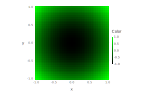

In [48]:
plot_nodes(g, p)

Next, we assemble the gradient operator $\mathbf{G}$.

In [49]:
Gd, G = assemble_G(g);
assert(norm(u_sol - u + G*p) < 0.0001); #verify that the gradient operator is correct
M = assemble_M(g);
A = assemble_A(g);

We compute $\mathbf{G}^T\mathbf{MG}$ using our precomuted matrix $\mathbf{M}$ and compare it with $\mathbf{A}$ to establish that the two methods give the same result.

In [52]:
GtM = G'*M;
GtMG = GtM*G;
assert(norm(full(GtMG) - A) < 0.0001);

Next we construct a procedure to enforce Dirichlet boundary conditions by explicitly injecting the known pressure values at the boundary nodes of the grid mesh.

In [53]:
# define a function to pin down a pressure values at the given nodes of the mesh
function pin_pressure!(A, rhs, p, nodes)
    rhs[:] -= sum(A[:,nodes]*p[nodes],2);
    rhs[nodes] = p[nodes]; # explicitly set the rhs as solved 
    l = length(rhs);
    A[:,nodes] = 0;
    A[nodes,:] = 0;
    A[(l+1)*nodes - l] = 1; # set the diagonal elements to 1
end

# a helper function to collect all boundary node indices
function get_bdry_nodes(g)
    bottom = [1:g.n];
    top = bottom + g.ne;
    left = bottom[2:g.n-1]*g.n - g.n + 1;
    right = left + g.n - 1;
    [bottom, left, right, top]
end
function get_internal_nodes(g)
    fst_row = [2:g.n-1];
    additive = [g.n:g.n:(g.ne-g.n)];
    vec(fst_row' .+ additive)
end

# define a function to force Dirichlet boundary conditions
function force_dirichlet!(g, A, rhs, p)
    pin_pressure!(A, rhs, p, get_bdry_nodes(g));
end;

Finally we assemble the linear system for each method and measure the difference from the true solution.

In [54]:
#= Assemble the linear system using the matrix A
GtM_A = transpose(full(G')\full(A')); # this line computes G^T M 
rhs_A = GtM_A*u;
force_dirichlet!(g, A, rhs_A, p);
println("Using matrix A: $(norm(p-A\rhs_A, Inf))");=#

# Assemble the linear system using the edge based mass matrix M
GtMG = GtM*G;
rhs = GtM*u;
force_dirichlet!(g, GtMG, rhs, p);
println("Using matrix M: $(norm(p-GtMG\rhs, Inf))");

Using matrix M: 5.218048215738236e-15


### Example 2
We proceed as previously with:  
$p = xy^3$,  
$\vec{u}_{out} = \left(y, -x\right)^T$, and  
$\vec{u}_{in} = (y + y^3, -x + 3xy^2)^T$.

In [66]:
# pressure solution
pressure2(x, y) = x*y*y*y;

# final velocity solution
output_velocity2(x, y) = [y, -x];

# initial conditions
input_velocity2(x, y) = [y + y*y*y, -x + 3*x*y*y];

In [67]:
#dx = 0.05; # side length of one grid cell
#xs, n, nn, nhe, ne = init_grid(dx);
p, u, u_sol = init(g, pressure2, input_velocity2, output_velocity2);

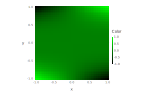

In [68]:
plot_nodes(g, p)

In [69]:
# We will reuse all the needed matrices
#A = assemble_A(dx, n, nn);
GtMG = G'*M*G; # rebuild this since we modified it after enforcing boundary conditions
assert(norm(u_sol - u + G*p) <= 0.5*g.dx); #verify that the gradient operator is correct

In [71]:
#= Assemble the linear system using the matrix A
rhs_A = GtM_A*u;
force_dirichlet!(g, A, rhs_A, p,);
println("Using matrix A: $(norm(p-A\rhs_A, Inf))");=#

# Assemble the linear system using the edge based mass matrix M
rhs = GtM*u;
force_dirichlet!(g, GtMG, rhs, p);
println("Using matrix M: $(norm(p-GtMG\rhs, Inf))");

Using matrix M: 8.326672684688674e-16


### Homogeneous Neumann Boundary Conditions
### Example 3
Using a pressure function with zeros on the boundary, we can construct a function with zero Neumann boundary conditions:  
Let $u^+ \equiv \cos( \frac{\sqrt{2}\pi}{3}(x+y)+\frac{\pi}{2})$ and 
$u^- \equiv\cos( \frac{\sqrt{2}\pi}{3}(x-y)-\frac{\pi}{2})$. Then define:  
$p = -\cos(\frac{\pi}{2}x)\cos(\frac{\pi}{2}y)$,  
$\vec{u}_{out} = \frac{1}{\sqrt{2}}\left(u^- - u^+, u^- + u^+\right)^T$, and  
$\vec{u}_{in} = \vec{u}_{out} + \nabla p$  

In [73]:
# pressure solution
#pressure3(x, y) = x*y*y*y;
pressure3(x, y) = -cos(0.5*pi*x)*cos(0.5*pi*y);

# final velocity solution
t = (sqrt(2)*pi)/3;
up(x,y) = cos(t*(x + y) + pi/2);
um(x,y) = cos(t*(x - y) - pi/2);
output_velocity3(x, y) = [um(x,y) + up(x,y), um(x,y) - up(x,y)]/sqrt(2);

# initial conditions
#grad_p(x,y) = [y*y*y, 3*x*y*y];
grad_p(x,y) = [ 0.5*pi*sin(0.5*pi*x)*cos(0.5*pi*y), 0.5*pi*sin(0.5*pi*y)*cos(0.5*pi*x) ];
input_velocity3(x, y) = output_velocity3(x,y) + grad_p(x,y);

In [86]:
dx = 0.05; # side length of one grid cell
g = init_grid(dx);
p, u, u_sol = init(g, pressure3, input_velocity3, output_velocity3);

[0.0,-1.4085107719887895]
[0.0,1.4085107719887895]


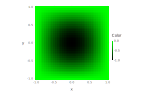

In [75]:
plot_nodes(g, p)

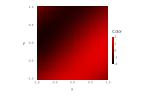

In [76]:
# We will reuse all the needed matrices
Gd, G = assemble_G(g);
#A = assemble_A(g);
M = assemble_M(g);
#GtM = Gd'*M;
D = Gd'*M;
A = D*Gd; # rebuild this since we modified it after enforcing boundary conditions
#assert(norm(u_sol - u + G*p) <= 0.5*g.dx); #verify that the gradient operator is correct
plot_hedges(g, u)

In [79]:
#= Assemble the linear system using the matrix A
rhs_A = D*u;
#pin_pressure!(A, rhs_A, p, [div(g.n*g.n, 2)]);
println("Using matrix A: $(norm(p-A\rhs_A, Inf))");=#

# Assemble the linear system using the edge based mass matrix M
#u[get_normal_bdry_edges(g)] = 0;
b = D*u;
#pin_pressure!(GtMG, rhs, p, [div(g.n*g.n, 2)]);
#println(size(Gd));
#println(size(G));
#println(full(int(G*3)));
#println(full(int(G/2)));
#println(full(D));
#println(size(D));
#println(full(GtMG));

pdnew = A\b;
pnew = zeros(p);
#println(size(pnew));
#println(size(pdnew));
pnew[get_not_bdry_corners(g)] = pdnew;
println("Using matrix M: $(norm(p-pnew, Inf))");
unew = u - G*pnew;

Using matrix M: 0.17087185240218813


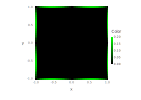

In [80]:
plot_nodes(g, abs(p-pnew))

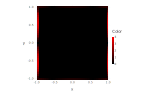

In [81]:
plot_hedges(g, abs(u_sol-unew))

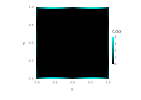

In [82]:
plot_vedges(g, abs(u_sol-unew))

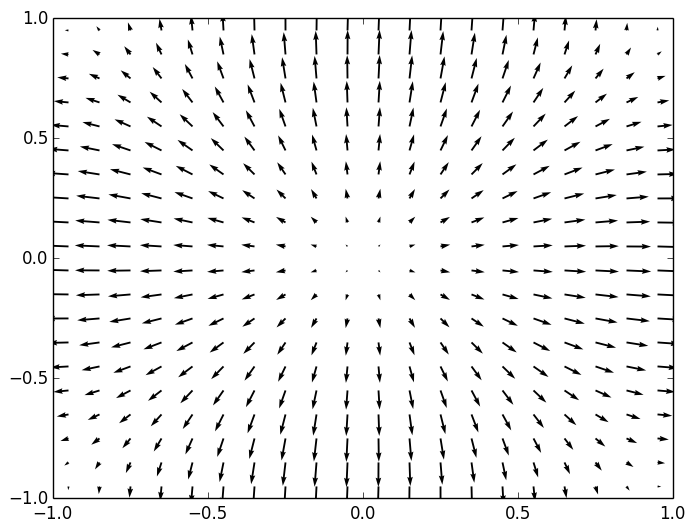

In [28]:
plot_vecfield(g, G*pnew);

In [29]:
plot_vecfield(g, u - Gorig*pnew);

LoadError: Gorig not defined
while loading In[29], in expression starting on line 1

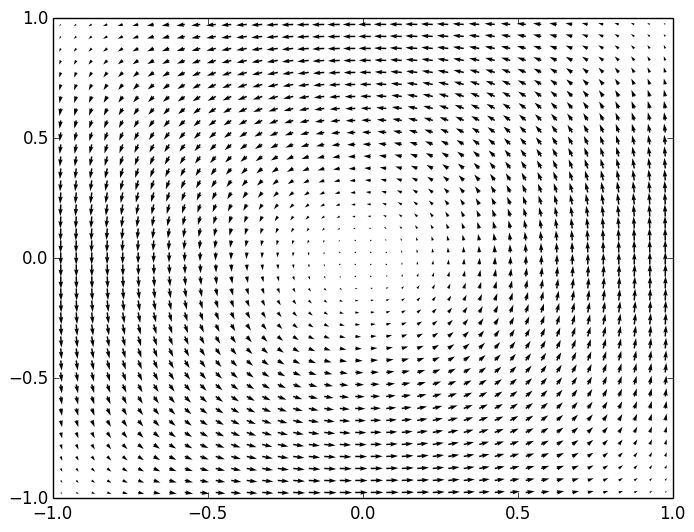

In [305]:
plot_vecfield(g, u_sol);

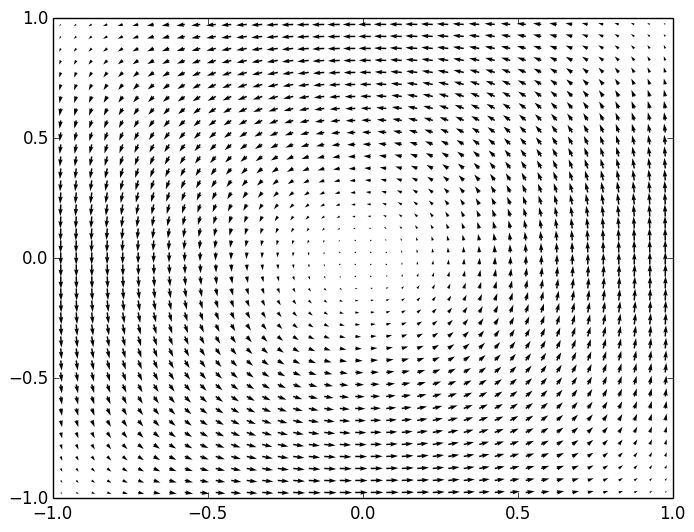

In [306]:
plot_vecfield(g, u_sol);

## Convergence in both examples
We will now look at the convergence of the projection method with respect to grid size.

In [36]:
# Define priniting routines
function printheader()
    @printf(" grid  , P inf-norm , order , v inf-norm , order , P two-norm , order , v two-norm , order , P one-norm , order , v one-norm , order \n");
end

function printdata!(g::MFDGrid, pdiff, udiff, prev)
    pmax = norm(pdiff, Inf);
    p2 = 0.5*g.dx*norm(pdiff, 2);
    p1 = 0.25*g.dx*g.dx*norm(pdiff, 1);    
    umax = norm(udiff, Inf);
    u2 = 0.5*g.dx*norm(udiff, 2);
    u1 = 0.25*g.dx*g.dx*norm(udiff, 1);
    data = [pmax, umax, p2, u2, p1, u1];

    order = zeros(6);
    if ( prev != zeros(6) )
        order = log2(prev./data);
    end
    
    @printf("%4d^2 , %8.4e , %5.2f , %8.4e , %5.2f", g.n-1, data[1], order[1], data[2], order[2]);
    @printf(" , %8.4e , %5.2f , %8.4e , %5.2f", data[3], order[3], data[4], order[4]);
    @printf(" , %8.4e , %5.2f , %8.4e , %5.2f \n", data[5], order[5], data[6], order[6]);
    prev[:] = data;
end;

In [39]:
# Convenience routine to assemble system given a pressure, input velocity and output velocity functions
function assemble(dx, pres, v_in, v_out)
    # Assemble the linear system using the edge based mass matrix M
    g = init_grid(dx);
    p, u_in, u_sol = init(g, pres, v_in, v_out);
    Gd, G = assemble_G(g);
    M = assemble_M(g);
    D = G'*M;
    A = D*G;
    b = D*u_in;
    A, b, G, p, u_in, u_sol, g
end
# Convenience method to solve a given system and output the error from the ground truth
function solve(A, b, G, p, u_in, u_sol)
    pnew = A\rhs;
    unew = u_in - G*pnew;
    pdiff = p - pnew;
    udiff = u_sol - unew;
    pdiff, udiff
end;

In [40]:
is1 = [1:7];
dxs = 2./2.^is1;
printheader();
prev = zeros(6);
data1 = Array(Float64,(length(is1),6));
for i in is1
    dx = dxs[i];
    GtMG, rhs, G, p, u_in, u_sol, g = assemble(dx, pressure1, input_velocity1, output_velocity1);
    force_dirichlet!(g, GtMG, rhs, p);
    pdiff, udiff = solve(GtMG, rhs, G, p, u_in, u_sol);
    printdata!(g, pdiff, udiff, prev);
    data1[i,1:6] = prev;
end

 grid  , P inf-norm , order , v inf-norm , order , P two-norm , order , v two-norm , order , P one-norm , order , v one-norm , order 


LoadError: force_dirichlet! not defined
while loading In[40], in expression starting on line 6

In [75]:
is2 = [1:7];
dxs = 2./2.^is2;
printheader();
prev = zeros(6); # a previous set of data
data2 = Array(Float64,(length(is2),6));
for i in is2
    dx = dxs[i];
    GtMG, rhs, G, p, u_in, u_sol, g = assemble(dx, pressure2, input_velocity2, output_velocity2);
    force_dirichlet!(g, GtMG, rhs, p);
    pdiff, udiff = solve(GtMG, rhs, G, p, u_in, u_sol);
    printdata!(g, pdiff, udiff, prev);
    data2[i,1:6] = prev;
end

 grid  , P inf-norm , order , v inf-norm , order , P two-norm , order , v two-norm , order , P one-norm , order , v one-norm , order 
   2^2 , 0.0000e+00 ,  0.00 , 2.5000e-01 ,  0.00 , 0.0000e+00 ,  0.00 , 2.5000e-01 ,  0.00 , 0.0000e+00 ,  0.00 , 2.5000e-01 ,  0.00 
   4^2 , 0.0000e+00 ,   NaN , 6.2500e-02 ,  2.00 , 0.0000e+00 ,   NaN , 4.9411e-02 ,  2.34 , 0.0000e+00 ,   NaN , 4.6875e-02 ,  2.42 
   8^2 , 4.1633e-17 ,  -Inf , 1.5625e-02 ,  2.00 , 1.0993e-17 ,  -Inf , 1.0698e-02 ,  2.21 , 6.1720e-18 ,  -Inf , 9.7656e-03 ,  2.26 
  16^2 , 1.6653e-16 , -2.00 , 3.9063e-03 ,  2.00 , 3.7809e-17 , -1.78 , 2.4657e-03 ,  2.12 , 2.4919e-17 , -2.01 , 2.1973e-03 ,  2.15 
  32^2 , 2.7756e-16 , -0.74 , 9.7656e-04 ,  2.00 , 5.8772e-17 , -0.64 , 5.9018e-04 ,  2.06 , 3.6230e-17 , -0.54 , 5.1880e-04 ,  2.08 
  64^2 , 1.0547e-15 , -1.93 , 2.4414e-04 ,  2.00 , 1.9740e-16 , -1.75 , 1.4425e-04 ,  2.03 , 1.3336e-16 , -1.88 , 1.2589e-04 ,  2.04 
 128^2 , 5.8287e-15 , -2.47 , 6.1035e-05 ,  2.00 , 2.1368e-15 

In [367]:
is3 = [1:10];
dxs = 2./2.^is3;
printheader();
prev = zeros(6); # a previous set of data
data3 = Array(Float64,(length(is3),6));
for i in is3
    dx = dxs[i];
    A, b, G, p, u_in, u_sol, g = assemble(dx, pressure3, input_velocity3, output_velocity3);
    assert(norm(u_sol - u_in + G*p) <= 0.5*dx);
    #pin_pressure!(GtMG, rhs, p, [div(g.n*g.n, 2)]);
    #force_dirichlet!(g, GtMG, rhs, p);
    pdiff, udiff = solve(A, b, G, p, u_in, u_sol);
    printdata!(g, pdiff, udiff, prev);
    data3[i,1:6] = prev;
end

 grid  , P inf-norm , order , v inf-norm , order , P two-norm , order , v two-norm , order , P one-norm , order , v one-norm , order 
   2^2 , 1.1072e-01 ,  0.00 , 2.2204e-16 ,  0.00 , 1.5658e-01 ,  0.00 , 1.9230e-16 ,  0.00 , 2.2144e-01 ,  0.00 , 1.6653e-16 ,  0.00 
   4^2 , 6.2056e-01 , -2.49 , 3.9898e-02 , -47.35 , 7.4335e-01 , -2.25 , 4.8865e-02 , -47.85 , 9.2892e-01 , -2.07 , 5.9847e-02 , -48.35 
   8^2 , 2.9950e-01 ,  1.05 , 7.8301e-02 , -0.97 , 3.0968e-01 ,  1.26 , 5.4896e-02 , -0.17 , 3.4811e-01 ,  1.42 , 5.8880e-02 ,  0.02 
  16^2 , 1.1863e-01 ,  1.34 , 1.0121e-01 , -0.37 , 1.0102e-01 ,  1.62 , 5.4354e-02 ,  0.01 , 1.0680e-01 ,  1.70 , 5.5497e-02 ,  0.09 
  32^2 , 3.8976e-01 , -1.72 , 1.1336e-01 , -0.16 , 3.7759e-01 , -1.90 , 5.3230e-02 ,  0.03 , 3.8928e-01 , -1.87 , 5.3141e-02 ,  0.06 
  64^2 , 6.8186e-01 , -0.81 , 1.1965e-01 , -0.08 , 6.6823e-01 , -0.82 , 5.2470e-02 ,  0.02 , 6.7862e-01 , -0.80 , 5.1784e-02 ,  0.04 
CHOLMOD warning: matrix not positive definite
 128^2 , 4.79

LoadError: interrupt
while loading In[367], in expression starting on line 6

In [77]:
# Define plotting routines
function plot_results(xdata,ydata,ylabel)
    logydata = log2(ydata);
    a,b = linreg(xdata, logydata);
    pl = plot(x=xdata, y=logydata, Guide.XLabel("Grid Size"), Guide.YLabel("Log( $ylabel )"), Geom.point);
    append!(pl.layers, layer(x=xdata, y=[a+b*i for i in xdata], Geom.line));
    println("slope = $b");
    println("R = $(cor(xdata,logydata))");
    pl
end;

slope = 0.2618467632816352
R = 0.7431887438107564


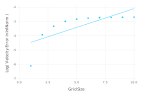

In [78]:
plot_results([1.0:size(data3, 1)], data3[:,2], "Velocity Error in Inf-Norm")

slope = 0.09047745848551839
R = 0.5037658652402995


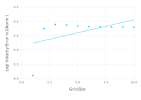

In [79]:
plot_results([1.0:size(data3, 1)], data3[:,4], "Velocity Error in 2-Norm")

slope = 0.04249111665278979
R = 0.3212205692411569


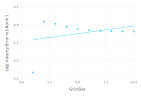

In [80]:
plot_results([1.0:size(data3, 1)], data3[:,6], "Velocity Error in 1-Norm")